# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Задание 1. Импортируем библиотеки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Задание 2. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:/datasets/real_estate_data.csv**

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Задание 3. О качестве данных ничего неизвестно, поэтому перед проверкой гипотез понадобится обзор данных. Выведем 5 строчек таблицы на экран, чтобы ознакомиться с содержимым файла.**

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Задание 4. Выведем основную информацию о датафрейме. Найдем дубликаты.**

In [4]:
data.info()
print('\nЧисло дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


После вызова метода info() видно явное несоответствие типов данных и наличие пропусков, а именно: количество значений в столбцах различается, есть пропущенные значения в 14 столбцах из 22. Необходимо выяснить, с чем связаные данные пропуски и определить на какие значения их можно заменить (0, среднее, медиана), или исключить из таблицы, как выбросы.

**Задание 5. Построем общую гистограмму для всех числовых столбцов таблицы.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

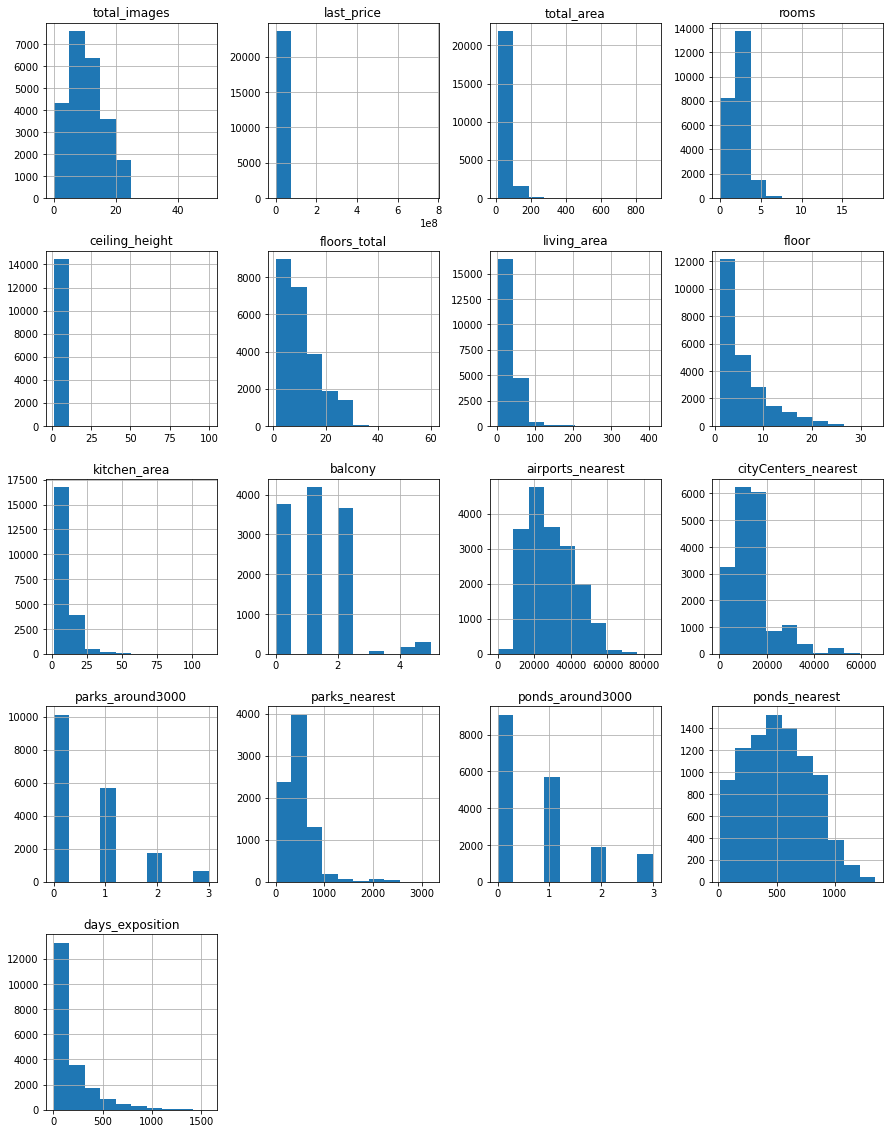

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

Найдем столбцы с пропущенными значениями

In [7]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В 14 столбцах из 22 выявлены пропущенные значения.
1. в столбце "высота потолков" данные могут быть пропущены по причине того, что их высота стандартная для многоквартирной застройки - 2,45 или 2,50 м. данном случае, этот параметр не является привлекательным (более высокие потолки "рекламируют" квартиру при ее продаже). Количество пропущенных данных значительно, поэтому будем менять пропуски на стандартное значение - 2,5 м.
2. в столбце "всего этажей в доме" данные могут быть пропущены по причине продажи одноэтажного дома. Количество пропусков в данном столбце незначительно, заменим пропуски на значение "1".
3. в столбце "жилая площадь в квадратных метрах" данные могут пропущены по причине совпадения жилой и общей площади квартиры, в связи с чем при подаче заявления продавец не счел нужным указывать ту же самую площадь два раза. Заменим пропущенные значения на соответствующие значения из столбца "общая площадь".
4. в столбце апартаменты (булев массив) данные пропущены по причине того, что продаваемые квартиры не являются апартаментами. В данном случае пропуски заменим на "0", так как "0" в булевом массиве означает отсутствие информации.
5. В столбце "Площадь кухни в квадратных метрах" информация может отсутствовать по причине отсутствия самого помещения (например, это студия). Пропущенные значения можно не заполнять.
6. В столбце "число балконов" пропуски значений обусловлены, скорее всего отсутствием балконов. Такие пропуски мы заменим на "0".
7. в столбце "название населённого пункта" пропуски носят критичный характер, потому что необходимо точно знать, где находится продаваемая квартира. Поэтому подобные строки(а их немного) необходимо удалить из датасета.
8. Пропуски в таких столбцах как "расстояние до ближайшего аэропорта в метрах (м)", " расстояние до центра города (м)", "расстояние до ближайшего парка (м)", , "расстояние до ближайшего водоёма (м)" обусловлены скорее всего отсутствием подобных расчетов у продавца, либо отсутствие таких локаций, как пруд или парк. Подобные пропуски не могут быть заполнены никакими данными.
9. Пропуски в столбцах "число парков в радиусе 3 км" и "число водоёмов в радиусе 3 км" могут означать их отсутствие. Заменим пропуски на 0.
10. В столбце "сколько дней было размещено объявление (от публикации до снятия)" отсутствие пропусков скорее всего связано с тем, что объявление еще снято, то есть квартира на момент получения данных (формирования массива данных) не была продана.

In [8]:
# заменяем пропущенные значения на стандартные значения в столбце "ceiling_height"
data['ceiling_height'] = data['ceiling_height'].fillna(value='2.5') 

In [9]:
# заменяем пропущенные значения в столбце "floors_total"
#data['floors_total'] = data['floors_total'].fillna(value='1')

In [10]:
# заменяем пропущенные значения в столбце "living_area" на среднее значение в соответствующей строке столбца "total_area"
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

In [11]:
# заменяем пропущенные значения в столбце "is_apartment" на нет
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [12]:
# заменяем пропущенные значения в столбце "balcony" на 0
data['balcony'] = data['balcony'].fillna(value=0)

In [13]:
# удаляем записи, где отсутствуют данные в столбце "locality_name"
data.dropna(subset=['locality_name'], inplace=True)

In [14]:
# заменяем пропущенные значения в столбцах "parks_around3000" и "ponds_around3000" на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Проверим пропущенные значения после обработки

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Работа с типами данных

Изменим типы данных в тех столбцах, где это необходимо для наглядности.

In [16]:
# Приводим к типу даты данные столбца "дата публикации"
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
# Приводим в целочисленный вид данные столбца "число балконов"
data['balcony'] = data['balcony'].astype(int)

In [18]:
# Приводим в целочисленный вид данные столбца "число парков в радиусе 3 км" и "число водоёмов в радиусе 3 км"
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [19]:
# Приводим столбец "Высота потолков" к числовому значению
data['ceiling_height'] = data['ceiling_height'].astype('float64')

In [20]:
# Приводим столбец "Этажей в доме" к числовому значению
data['floors_total'] = data['floors_total'].astype('float64')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Были изменены типы данных в следующих столбцах: "дата публикации", "число балконов", "высота потолков", "этажей в доме", "число парков в радиусе 3 км" и "число водоёмов в радиусе 3 км". В получившемся формате дата становится удобной для прочтения и анализа, число балконов, парков и прудов не должна состоять из дробных частей, поэтому их мы перевели в целочисленный вид.

#### Устранение дубликатов

In [22]:
# проверим наличие явных дубликатов
data.duplicated().sum()

0

In [23]:
# просмотр уникальных значений в столбце locality_name.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При просмотре уникальных значений выявлены различные написания одного и того же населенного пункта: например, «поселок городского типа Красный Бор» и «посёлок городского типа Красный Бор», «поселок Мурино» и «посёлок Мурино» — это обозначения одних и тех же населённых пунктов. Видимо, это связано с субъективным человеческим фактором при заполнении объявления продавцами. Удалим название типа населенного пункта, оставив только его название.

In [24]:
# количество уникальных значений до исправления (категоризации)
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [25]:
print('количество уникальных значений до категоризации:', len(data['locality_name'].unique()))

количество уникальных значений до категоризации: 364


In [26]:
#поиск в строковых переменных текстового фрагмента и его замена!
#словарь для удаления значений
replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']

#функция , удаляющая значения из replace_dict в столбце locality_name:
for value in replace_dict:
    data['locality_name'] = data['locality_name'].str.replace(value, '')

In [27]:
data['locality_name'].describe()

count               23650
unique                305
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [28]:
print('количество уникальных значений после категоризации:', len(data['locality_name'].unique()))

количество уникальных значений после категоризации: 305


Количество уникальных значений сократилось, значит нам удалось исключить неявные дубликаты в виде некорректного наименования одного того же населенного пункта.

#### Поиск и устранение редких и выбивающихся значений

Столбец last_price

In [29]:
# Проверим цены на объективность
display(data.loc[(data['last_price'] < 1000000)&(data['locality_name'] == 'Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


Цена за квартиру в Санкт-Петербурге составляет 12190 рублей. Видимо, продавец при заполнении объявления указал цену в тыс. рублей. Исправим цену.

In [30]:
data.loc[8793, 'last_price'] = 12190000

In [31]:
# проверим еще раз цены
display(data.loc[(data['last_price'] < 1000000)&(data['locality_name'] == 'Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Было выявлено одно выбивающееся значение в столбце last_price. Данное несоответствие устранено вручную, исправлением цены на рубли.

Столбец rooms

In [32]:
# сгруппируем данные по столбцу "комнаты" и посчитаем количество объектов в разрезе комнат 
city_rooms = data.groupby('rooms')['rooms'].count()
city_rooms

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [33]:
# отбросим выбивающиеся значения
data = data[data['rooms'] < 10]

In [34]:
# проверим, что у нас все получилось.
city_rooms = data.groupby('rooms')['rooms'].count()
city_rooms

rooms
0     197
1    8036
2    7924
3    5797
4    1175
5     326
6     105
7      59
8      12
9       8
Name: rooms, dtype: int64

Столбец total_area

In [35]:
data['total_area'].describe()

count    23639.000000
mean        60.192182
std         34.824049
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

In [36]:
data['total_area'].sort_values().tail(20)

14088    402.00
13749    410.00
14991    413.50
22131    422.20
21955    431.00
3676     441.98
20273    460.80
6221     470.30
660      483.90
6621     488.00
22494    491.00
9826     494.10
12401    495.00
15016    500.00
5893     500.00
8018     507.00
4237     517.00
15651    618.00
3117     631.00
12859    631.20
Name: total_area, dtype: float64

Столбец ceiling_height.

In [37]:
# проверим количество значений с аномальной высотой потолка
city_ceiling_height = data.groupby('ceiling_height')['ceiling_height'].count()
city_ceiling_height.tail(10)

ceiling_height
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Таких значений оказалось немного, но скорее всего присутствует ошибка при заполнении объявления (человеческий фактор). Заменим значения по следующему условию.
</div>

In [38]:
data.update(data[(data['ceiling_height'] >=25)&(data['ceiling_height'] <=36)]['ceiling_height']/10)

In [39]:
# проверим исправление данных
data_ceiling_height = data.groupby('ceiling_height')['ceiling_height'].count()
data_ceiling_height.tail(10)

ceiling_height
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
100.0    1
Name: ceiling_height, dtype: int64

In [40]:
# отбросим выбивающиеся значения по условию
data = data[(data['ceiling_height'] >= 2.4)&(data['ceiling_height'] < 8)]

In [41]:
# проверим исправление данных
data_ceiling_height = data.groupby('ceiling_height')['ceiling_height'].count()
data_ceiling_height.head(10)

ceiling_height
2.40       23
2.45       15
2.46        2
2.47        3
2.48        8
2.49        1
2.50    12680
2.51       34
2.52       79
2.53       67
Name: ceiling_height, dtype: int64

Выводы по разделу 2:
1. найдены пропущенные значения и заменены на данные (или 0 (число балконов, к примеру), стандартное значение (высота потолков), среднее (жилая площадь)).
2. данные, которые невозможно было заполнить, удалены (строки с пропущенными значениями по столбцу "название населенного пункта")
3. изменены типы данных в тех столбцах, где это необходимо.
4. устранены неявные дубликаты в столбце "название населенного пункта".
5. **найдены редкие и выбивающееся значение в столбцах "цена на момент снятия с публикации", "высота потолков","количество комнат", "общая площадь". Проведены необходимые исправления.**

Можно выделить следующие причины пропусков данных:
1. в случае отсутствия информации продавец просто не заполнял поля, оставляя их пустыми. Это могло происходить также специально со стороны продавца, чтобы выгоднее представить продаваемый объект, либо неспециально, так как продавец мог не знать о наличии, либо отсутствии пруда или парка рядом.
2. данные могли собираться из разных источников, в которых могло не быть изначально некоторых вопросов, которые потом и загрузились в базу с пропусками.
3. как вариант, сбой при выгрузке данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
# добавим столбец, содержащий цену 1 кв.м.
data['one_metr_price'] = data['last_price']/data['total_area']
# переводим тип данных нового столбца к целочисленному виду
data['one_metr_price'] = data['one_metr_price'].astype(int)

In [43]:
# добавим столбец, содержащий день недели публикации объявления
data['day_week']= pd.to_datetime(data['first_day_exposition']).dt.dayofweek

In [44]:
# добавим столбец, содержащий месяц публикации объявления
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month

In [45]:
# добавим столбец, содержащий год публикации объявления
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

In [46]:
# добавим столбец, содержащий тип этажа квартиры
# создаем функцию
def type_floor_function(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(type_floor_function, axis=1)

In [47]:
# добавим столбец, содержащий расстояние до центра города в км
data['city_centres_km'] = round(data['cityCenters_nearest']/1000)

Для дальнейшего анализа были добавлены столбцы, содержащие информацию о цене за 1 кв. м., день недели, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в км.

### Проведите исследовательский анализ данных

#### Изучение общих параметров объекта

Наибольшие по площади варианты:


12859    631.2
3117     631.0
15651    618.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
9826     494.1
22494    491.0
Name: total_area, dtype: float64

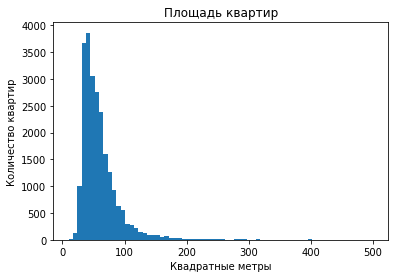

In [48]:
# изучим данные столбца общая площадь, построив гистограмму
plt.hist(data['total_area'], bins=70, range=(10,500))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show
print('Наибольшие по площади варианты:')
data['total_area'].sort_values(ascending=False).head(10)

В основном представлены квартиры общей площадью  от 30 до 100 кв.м. с пиком в сегменте 30-50 кв.м.. в Сегменте от 50 до 75 кв.м. представлено меньше квартир

Наибольшие по жилой площади варианты:


3117     360.288168
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.489832
15016    285.489832
9826     282.121052
Name: living_area, dtype: float64

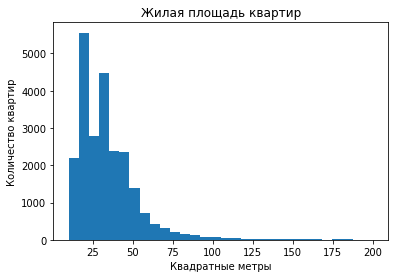

In [49]:
# изучим данные столбца жилая площадь, построив гистограмму
plt.hist(data['living_area'], bins=30, range=(10,200))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show
print('Наибольшие по жилой площади варианты:')
data['living_area'].sort_values(ascending=False).head(10)

По гистограмме видно, что в основном представлены квартиры с жилой площадью от 15 - 50 кв. с пиком 20-30 кв.м. Квартиры с жилой площадью более 50 кв.м. представлены в меньшем количестве, что соотносится с данными по общей площади.

Наибольшие по площади кухни варианты:


20215    107.0
2489     100.7
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
16647     72.0
6193      70.0
Name: kitchen_area, dtype: float64

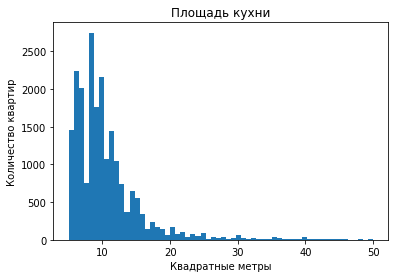

In [50]:
# изучим данные столбца площадь кухни, построив гистограмму
plt.hist(data['kitchen_area'], bins=60, range=(5,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show
print('Наибольшие по площади кухни варианты:')
data['kitchen_area'].sort_values(ascending=False).head(10)

По гистограмме видно, что в основном в квартирах представлены кухни площадью от 5 до 15 кв. м., с пиком в 7, 10, 12 и 15 кв.м.. По представленным данным, площадь кухни носит среднестатический характер.

Наибольшие по стоимости варианты:


12971    763.0000
14706    401.3000
1436     330.0000
15651    300.0000
22831    289.2384
16461    245.0000
13749    240.0000
5893     230.0000
8900     190.8700
19865    180.0000
Name: last_price_1, dtype: float64

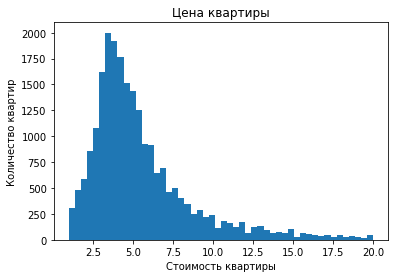

In [51]:
# изучим данные столбца цена объекта, построив гистограмму
data['last_price_1'] = data['last_price']/1000000
plt.hist(data['last_price_1'], bins=50, range=(1,20))
plt.title('Цена квартиры')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show
print('Наибольшие по стоимости варианты:')
data['last_price_1'].sort_values(ascending=False).head(10)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Рекомендации учтены. Действительно, более читаемо 👌
</div>

Цены на квартиры в основном находятся в диапазоне от 2,5 млн. рублей до 10 млн. рублей. Наибольшее количество квартир представлено в диапазоне 3 - 6 млн. рублей.

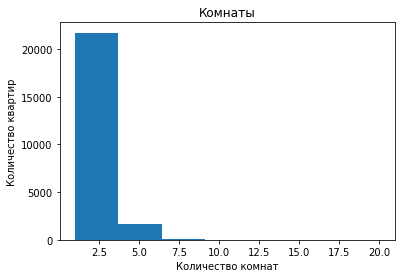

Наибольшие по числу комнат варианты:
20791    9
9550     9
8822     9
8860     9
13019    9
16915    9
15151    9
13397    9
11436    8
18945    8
Name: rooms, dtype: int64


In [52]:
# изучим данные столбца комнаты, построив гистограмму
plt.hist(data['rooms'], bins=7, range=(1,20))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))


В нашей выборке преобладают стандартные по количеству комнат квартиры: от 2 до 4 шт. 5 и Более комнат в квартирах представлены намного реже.

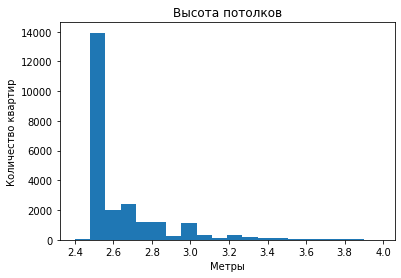

Наибольшие по высоте потолков варианты:
20264    6.0
21227    5.8
1388     5.6
7578     5.5
1026     5.3
12628    5.3
464      5.2
1053     5.0
21923    4.9
2802     4.8
Name: ceiling_height, dtype: float64


In [53]:
# изучим данные столбца высота потолков, построив гистограмму
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

В нашей выборке преобладают стандартные по высоте потолки в квартирах: 2,5 м. Также достаточно квартир по высоте потолков представлены в диапазоне от 2.5 до 3 м.

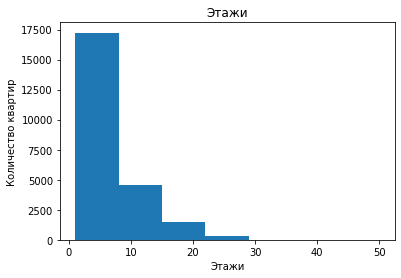

In [54]:
# изучим данные столбца этаж квартиры, построив гистограмму
plt.hist(data['floor'], bins=7, range=(1,50))
plt.title('Этажи')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

В нашей выборке представлены в основном квартиры, расположенные с 1 по 10 этаж. Скорее всего, таких домов в принципе построено больше, чем многоэтажных домов - свыше 15 этажей (это тенденция уже последних лет). 

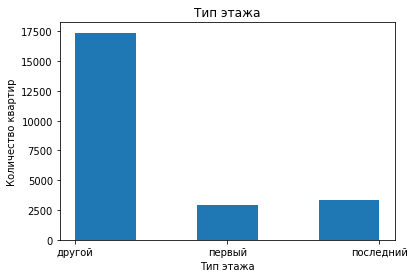

In [55]:
# изучим данные столбца тип этажа квартиры, построив гистограмму
plt.hist(data['type_floor'], bins=5)
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

В нашей выборке представлены в большинстве случаев квартиры не на первом и не на последнем этаже.

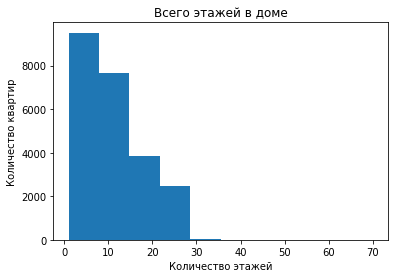

In [56]:
# изучим данные столбца всего этажей в доме, построив гистограмму
plt.hist(data['floors_total'], bins=10, range=(1,70))
plt.title('Всего этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

В нашей выборке представлены дома этажностью от 1 до 10 в большинстве случаев. Это соотносится с гистограммой этажности продаваемых квартир.

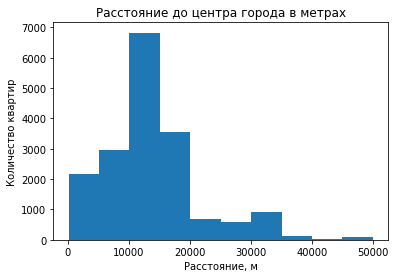

In [57]:
# изучим данные столбца расстояние до центра города в метрах, построив гистограмму
plt.hist(data['cityCenters_nearest'], bins=10, range=(100,50000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

В основном, расстояние до центра города - 10-15 км. Остальные варианты находятся дальше, возможно это пригород, он представлен в небольшом количестве относительно всей выборки.

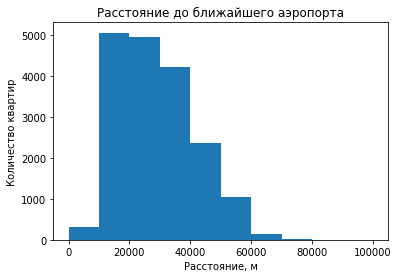

In [58]:
# изучим данные столбца расстояние до ближайшего аэропорта, построив гистограмму
plt.hist(data['airports_nearest'], bins=10, range=(1,100000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

В большинстве случаев, расстояние до аэропорта составляет от 10 до 40 км.

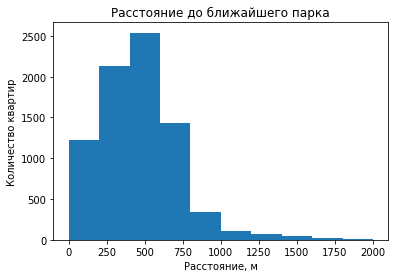

In [59]:
# изучим данные столбца расстояние до ближайшего парка, построив гистограмму
plt.hist(data['parks_nearest'], bins=10, range=(1,2000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

В большинстве случаев расстояние до ближайшего парка составляет 500 м, свыше 750 м. - уже реже.

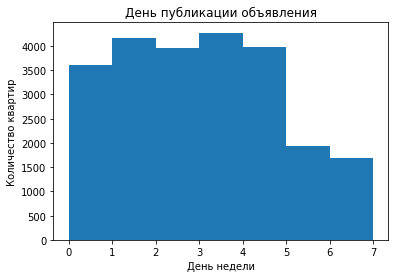

In [60]:
# изучим данные столбца день публикации объявления, построив гистограмму
plt.hist(data['day_week'], bins=7, range=(0,7))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

Наибольшая активность по публикации обявлений приходится на будние дни - со вторника по пятницу, в субботу и воскресенье активность резко падает.

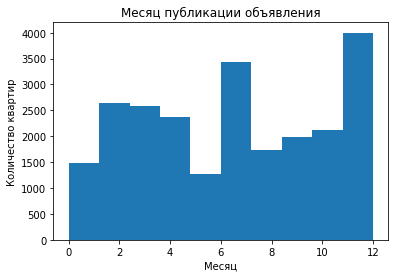

In [61]:
# изучим данные столбца месяц публикации объявления, построив гистограмму
plt.hist(data['month'], bins=10, range=(0,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Наибольшая активность по публикации объявлений в разрезе месяцев июль и декабрь, наименьшая - январь и июнь.

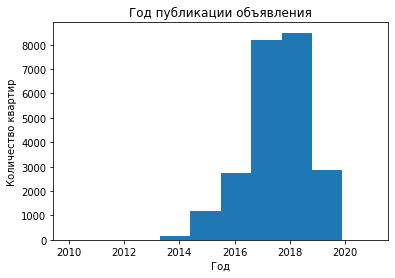

In [62]:
# изучим данные столбца год публикации объявления, построив гистограмму
plt.hist(data['year'], bins=10, range=(2010, 2021))
plt.title('Год публикации объявления')
plt.xlabel('Год')
plt.ylabel('Количество квартир')
plt.show()

Наблюдается повышение активности по продаже и покупке квартир, начиная с 2016 по 2019 годы.

Вывод:
1. Площадь. Большинство квартир - менее 100 квадратных метров, больше площадь встречается редко.
2. Стоимость. В основном стоимость квартир - порядка 3-6 миллионов.
3. Комнаты. В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшое количество квартир с 4 и более комнатами.
4. Высота потолков. Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.
5. Площадь кухни. Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.
6. Жилая площадь. Самые распространённые варианты с жилой площадью от 10 до 50 метров. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной.
7. Этаж, тип этажа и всего этажей в доме. В основном, представлены квартиры на этажах с 1 по 10. Есть квартиры (и дома соответсвенно) выше 15 этажей. Преобладают варианты квартир не на первом и не на последнем этаже.
8. Наибольшая активность по публикации обявлений приходится на будние дни - со вторника по пятницу, в субботу и воскресенье активность резко падает.
9. Наибольшая активность по публикации объявлений в разрезе месяцев июль и декабрь, наименьшая - январь и июнь.

#### Сроки продажи квартиры

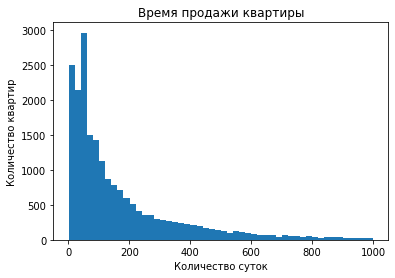

In [63]:
# определим время продажи квартиры, построив гистограмму для наглядности и удобства анализа
plt.hist(data['days_exposition'], bins=50, range=(1,1000))
plt.title('Время продажи квартиры')
plt.xlabel('Количество суток')
plt.ylabel('Количество квартир')
plt.show()

In [64]:
data['days_exposition'].mean()

180.73950278946853

In [65]:
data['days_exposition'].median()

95.0

Вывод:

Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.


#### Факторы, влияющие на стоимость объекта.

In [66]:
#основные данные 
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'day_week', 'month', 'year']].describe()

,last_price,total_area,living_area,kitchen_area,rooms,day_week,month,year
count,2.360800e+04,23608.000000,23608.000000,21344.000000,23608.000000,23608.000000,23608.000000,23608.000000
mean,6.517145e+06,60.207983,34.504013,10.556673,2.065359,2.568790,6.401644,2017.370044
std,1.055247e+07,34.839417,21.914239,5.828087,1.051722,1.788735,3.491383,1.037879
min,4.300000e+05,12.000000,2.000000,1.300000,0.000000,0.000000,1.000000,2014.000000
25%,3.405000e+06,40.000000,19.000000,7.000000,1.000000,1.000000,3.000000,2017.000000
50%,4.650000e+06,52.000000,30.000000,9.100000,2.000000,3.000000,6.000000,2017.000000
75%,6.792250e+06,69.700000,42.100000,12.000000,3.000000,4.000000,10.000000,2018.000000
max,7.630000e+08,631.200000,360.288168,107.000000,9.000000,6.000000,12.000000,2019.000000


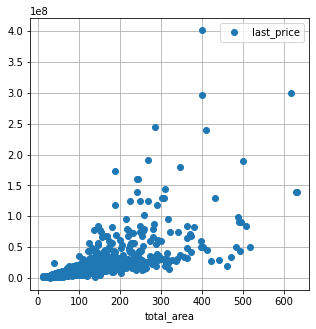

,total_area,last_price
total_area,1.000000,0.643955
last_price,0.643955,1.000000


In [67]:
# определяем зависимость цены от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
data[['total_area', 'last_price']].corr()

Судя по коэффициенту корреляции есть зависимости цены от общей площади. Чем больше площадь, тем больше стоимость квартиры.

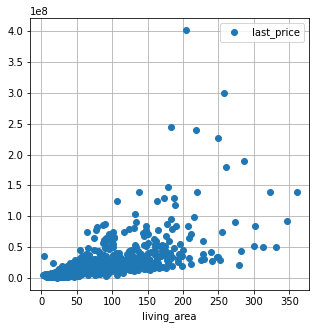

,living_area,last_price
living_area,1.000000,0.580742
last_price,0.580742,1.000000


In [68]:
# определяем зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
data[['living_area', 'last_price']].corr()

Коэффициент корреляции примерно похож на коэффициент корреляции от общей площади. Зависимость есть: чем больше жилая площадь, тем больше стоимость квартиры.

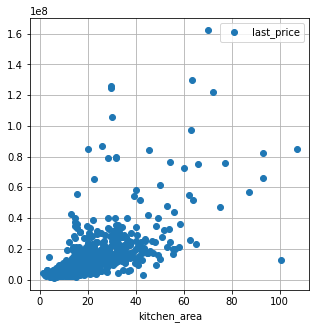

,kitchen_area,last_price
kitchen_area,1.000000,0.509914
last_price,0.509914,1.000000


In [69]:
# определяем зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
data[['kitchen_area', 'last_price']].corr()

Судя по коэффициенту корреляции зависимость цены от площади кухни выражена неярко.

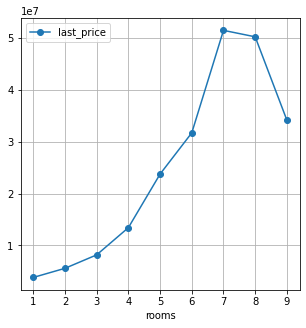

,rooms,last_price
rooms,1.000000,0.359158
last_price,0.359158,1.000000


In [70]:
# определяем зависимость цены от количества комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
data[['rooms', 'last_price']].corr()

Значение коэффициента корреляции стремится к нулю и, соответственно линейная зависимость отсутствует.

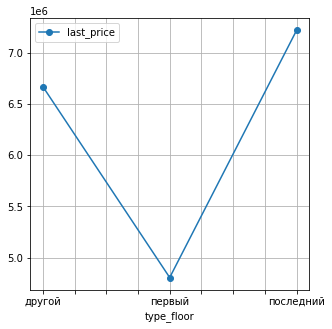

In [71]:
# определяем зависимость цены от типа этажа
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Самая низкая цена - у квартир на 1 этаже. Цена остальных квартир может зависеть от этажа, также наблюдаем увеличенную стоимость квартир на последних этажах. Это может зависеть от последних этажей новых высоток (вид из окна). 

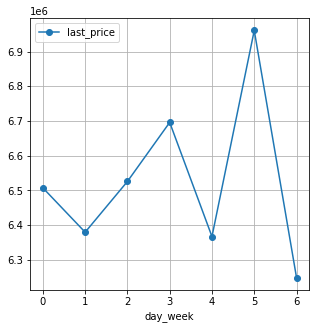

In [72]:
# определяем зависимость цены от даты размещения объявления
(
    data.pivot_table(index='day_week', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

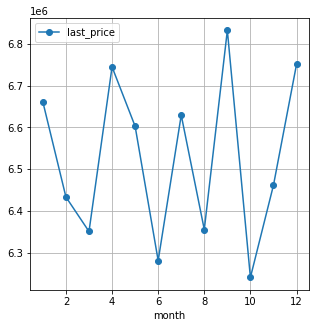

In [73]:
# определяем зависимость цены от месяца размещения объявления
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

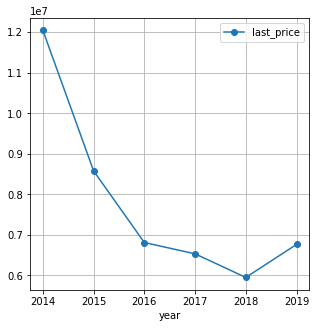

In [74]:
# определяем зависимость цены от года размещения объявления
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Значение коэффициента корреляции по временным параметрам (день недели, месяц, год) стремится к нулю и, соответственно отсутствует.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Согласно рекомендациям, расчет корреляции удален.
</div>

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [75]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten_high_number = data['locality_name'].value_counts().head(10)
city_ten_price = data.query('locality_name in (@city_ten_high_number.index)').pivot_table(values='one_metr_price', index='locality_name')
city_ten_price.sort_values('one_metr_price', ascending=False)

,one_metr_price
locality_name,
Санкт-Петербург,114816.750589
Пушкин,103125.373984
Кудрово,95325.726115
Парголово,90175.489297
Мурино,86087.055932
Шушары,78676.904545
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68718.853904


Наибольшая средняя стоимость квадратного метра, вполне очевидно, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано большим количеством парков. Затем идут районы Мурино и Кудрово, которые непосредственно примыкают к Санкт-Петербургу. Из топ-10 наименьшая стоимость в Гатчине, Всеволожске и Выборге, что обусловлено большим расстоянием от Санкт-Петербурга.

#### Cредняя цена каждого километра

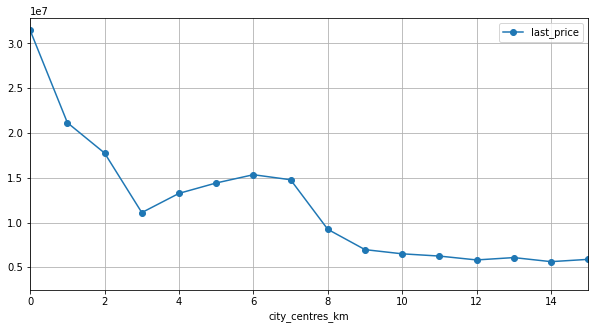

In [76]:
# Ранее мы рассчитали расстояние до центра в километрах.
# Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centres_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

По графику видно, что дальше 7 км от центра цена снижается.

Выводы по пункту 4:

Большинство квартир - менее 100 квадратных метров. В основном стоимость квартир - порядка 3-6 миллионов.

Медианное время продажи - 95 дней. Среднее время продажи - 181 день. В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

Существует линейная зависимость между общей и жилой площадью квартиры и стоимостью квартиры. Самая низкая цена у квартир на первом этаже. Зависимость цены от площади кухни возможно существует, но не носит ярко выраженный линейный характер. Значение коэффициента корреляции по временным параметрам (день недели, месяц, год) стремится к нулю и, соответственно отсутствует.

Наибольшая средняя стоимость квадратного метра, вполне очевидно, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано большим количеством парков. Затем идут районы Мурино и Кудрово, которые непосредственно примыкают к Санкт-Петербургу. Из топ-10 наименьшая стоимость в Гатчине, Всеволожске и Выборге, что обусловлено большим расстоянием от Санкт-Петербурга.

Стоимость квартир в центре Санкт-Петербурга выше, и дальше от центра цена снижается.

### Общий вывод

Представленные для анализа данные были изучены.

В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности: стоимость одного объекта недвижимости была указаны в тыс. рублей, а не в рублях), **найдены редкие и выбивающееся значение в столбцах "цена на момент снятия с публикации", "высота потолков","количество комнат", "общая площадь". Проведены необходимые исправления.**
Можно выделить следующие причины пропусков данных:
1. в случае отсутствия информации продавец просто не заполнял поля, оставляя их пустыми. Это могло происходить также специально со стороны продавца, чтобы выгоднее представить продаваемый объект, либо неспециально, так как продавец мог не знать о наличии, либо отсутствии пруда или парка рядом.
2. данные могли собираться из разных источников, в которых могло не быть изначально некоторых вопросов, которые потом и загрузились в базу с пропусками.
3. как вариант, сбой при выгрузке данных.
Указанные проблемы были устранены.

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года публикации объявления, типа этажа (первый, последний, другой), расстояние до центра города в км.

Были рассмотрены следующие параметры:
1. зависимость стоимости квартиры от общей площади, от типа этажа, города расположения продаваемого объекта. Изучение общих параметров объектов показало, что на рынке недвижимости представлено жилье общей площадью до 100 кв.м. стоимостью 3-6 млн. рублей, также представлены квартиры, как меньшие по стоимости, так и большие. Спросом пользуются 1-3 комнатные квартиры небольшой площади 30-75 кв.м. Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. В основном, представлены квартиры на этажах с 1 по 10. Есть квартиры (и дома соответственно) выше 15 этажей. Преобладают варианты квартир не на первом и не на последнем этаже.
Наибольшая активность по публикации объявлений приходится на будние дни - со вторника по пятницу, в субботу и воскресенье активность резко падает, в разрезе месяцев: наибольшая активность - в июле и декабре, наименьшая - в январе и июне.
2. Медианное время продажи - 95 дней. Среднее время продажи - 181 день. В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.
3. Факторы, влияющие на стоимость: на стоимость больше влияет площадь квартиры, чем число комнат, или площадь кухни (коэфициент корреляции составляет 0,65). Первый этаж значительно дешевле остальных вариантов.
4. Стоимость квадратного метра в топ-10 населённых пунктов: максимальная стоимость квадратного метра - в Санкт-Петербурге (114856), минимальная - в Выборге (58141).

Сервис Яндекс.Недвижимость конкурирует с такими сервисами, как ЦИАН, ДомКлик, Авито и др. по привлечению большей целевой аудитории и пользователей, которые могут быть потенциальными клиентами.
Рекомендации:
1. Доработать внесение информации в автоматическом режиме по тем позициям, которые получаются автоматически на основе картографических данных. Например, продавцу не надо будет вводить данные по расстоянию до центра, до аэропорта, ближайшего парка и водоёма. В связи с этим необходимо добавить обязательный параметр "адрес объекта".
2. Добавить новую позицию (к уже имеющимся позициям по расстояниям) - расстояние до метро (очень актуально в таком большом городе, как Санкт-Петербург, и одновременно привлекательно для покупателей).